### 라이브러리 설치

In [35]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

### 데이터 불러오기

In [37]:
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data() #데이터 불러오기

x_train=x_train.reshape(-1, 28, 28, 1) #텐서로 변환 (높이, 너비, 채널)
x_test=x_test.reshape(-1, 28, 28, 1)

In [5]:
# 이미지 데이터를 텐서 3차원 데이터로 변환하는 reshape 함수

CNN에 이미지를 입력할 때는(높이, 너비, 채널)의 형식으로 입력 데이터가 준비되어야 합니다. 
Fashion MNIST 데이터는 기본적으로 (28, 28) 크기의 2차원 이미지이므로 CNN에서 처리할 수 있도록 
(28, 28, 1) 크기의 3차원 데이터로 변환해 주어야 합니다. 이 마지막 1이 채널 수를 나타냅니다.

reshape 함수는 데이터를 새로운 형태로 변환하는 역할을 합니다. 
여기서 reshape(-1, 28, 28, 1)은 다음과 같은 의미를 가집니다.

-1: 이 부분은 전체 데이터의 개수를 의미합니다. -1을 사용하면, 
reshape 함수가 자동으로 데이터의 개수를 계산해줍니다. 
x_train에는 60,000개의 이미지가 있으므로, -1은 60,000으로 자동 변환됩니다.

reshape 함수에서 -1을 사용하는 것은 매우 유용한 기능입니다. 전체 데이터를 자동으로 계산해주기 때문에, 직접 개수를 지정하지 않고 데이터의 다른 차원만 명시하면 됩니다. 예를 들어, 데이터의 총 크기가 (60000, 28, 28)이라면, reshape(-1, 28, 28, 1)은 첫 번째 차원(이미지 개수)을 알아서 60,000으로 계산해 줍니다.

In [39]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000,) (10000,)


In [41]:
#정규화 
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

### CNN 모델 구축

In [43]:
cnn = Sequential()

In [45]:
#Feature Extract층
cnn.add(Conv2D(input_shape=(28,28,1), kernel_size=(3,3),
               filters=32, activation='relu')) #28x28x1의 텐서를 입력값으로 받고, 3x3의 필터를 32개 갖고 있는 컨브
cnn.add(Conv2D(kernel_size=(3,3), filters=64, activation='relu')) #두번째 컨브층이니까 입력값은 없음. 
cnn.add(MaxPool2D(pool_size=(2,2))) 
cnn.add(Dropout(0.25)) 

# Flat Layer층
cnn.add(Flatten()) #3차원의 텐서를 1차원 벡터로 변환하는 층

cnn.add(Dense(128, activation='relu')) #은닉층 개념 
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax')) # 출력층 정답의 갯수랑 동일한 출력값 10개를 soft max로 분류

In [53]:
#cnn모델 컴파일 및 학습
cnn.compile(loss='sparse_categorical_crossentropy',
            optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

cnn.summary()

hist = cnn.fit(x_train, y_train, batch_size=128, 
               epochs=30, validation_data=(x_test, y_test))

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 55ms/step - accuracy: 0.7286 - loss: 0.7609 - val_accuracy: 0.8663 - val_loss: 0.3628
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 54ms/step - accuracy: 0.8633 - loss: 0.3872 - val_accuracy: 0.8909 - val_loss: 0.3003
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 54ms/step - accuracy: 0.8826 - loss: 0.3228 - val_accuracy: 0.9013 - val_loss: 0.2710
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 55ms/step - accuracy: 0.8962 - loss: 0.2879 - val_accuracy: 0.9096 - val_loss: 0.2491
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 56ms/step - accuracy: 0.9083 - loss: 0.2591 - val_accuracy: 0.9110 - val_loss: 0.2400
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 56ms/step - accuracy: 0.9104 - loss: 0.2395 - val_accuracy: 0.9107 - val_loss: 0.2421
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 27s 57ms/step - accuracy: 0.9179 - loss: 0.2227 - val_accuracy: 0.9170 - val_loss: 0.2266
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 59ms/step - accuracy: 0.9258 - loss: 0.2042 - 

### 모델 정확도 평가

In [57]:
cnn.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9295 - loss: 0.2839


[0.269466370344162, 0.9316999912261963]

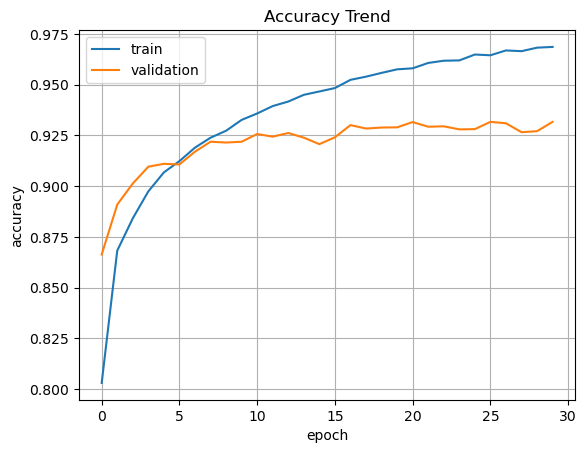

In [59]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='best')
plt.grid()
plt.show()

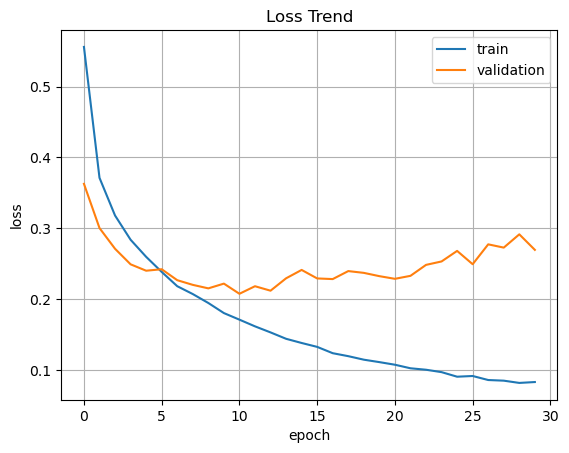

In [61]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='best')
plt.grid()
plt.show()